# Gun control and mass shootings

This notebooks attempts to find if there is a correlation between gun ownership and mass shootings in the US.

In [1]:
from arcgis.gis import GIS
from arcgis.lyr import FeatureService

gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "P@ssw0rd")

In [2]:
massshootings = gis.content.search("US Mass Shootings 2013-2015", "Feature Service", max_items=1)[0]

<Item title:"US Mass Shootings 2013-2015" type:Feature Service owner:deldev>
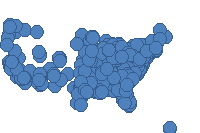

In [3]:
massshootings

In [4]:
usstates = gis.content.search("USA States (Generalized)", "Feature Service", max_items=1)[0]

<Item title:"USA States (Generalized)" type:Feature Service owner:esri>
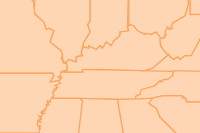

In [5]:
usstates

For our analysis, we aggregate the mass shootings into the US states, using the Spatial Analysis aggregate_points() tool:

In [6]:
aggr_incidents = gis.tools.analysis.aggregate_points(massshootings, usstates)

In [7]:
map = gis.map('USA', 4)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [8]:
map

<img src="http://esri.github.io/arcgis-python-api/notebooks/nbimages/guncontrol.png"/>

The code below queries ArcGIS Online for gun ownership by state, and displays machinegun ownership using Classed Color renderer on the map. The states shaded the darkest have the highest machine gun ownership, and the lightest states have the lowest.

In [9]:
gunownership = gis.content.search("GunOwnership", "Feature Service", max_items=1)[0]

<Item title:"GunOwnership" type:Feature Service owner:mass_shootings_project>
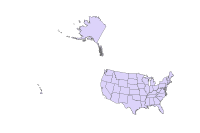

In [10]:
gunownership

In [11]:
gunownership_lyr = FeatureService(gunownership).layers[0]

In [12]:
map.add_layer({
        "type": "FeatureLayer",
        "url" : gunownership_lyr['url'],
        "renderer" : "ClassedColorRenderer",
        "field_name" : "Machinegun"
    })

To compare the gun ownership with the aggregates mass shootings, the code below overlays the results of the aggregates mass shootings per state using the pink circles (default) renderer. States with larger circles have witnessed larger number of mass shootings.

In [13]:
map.add_layer(aggr_incidents['aggregated_layer'])

The code below looks at the data behind the layers, as well as the data behind the results of our analysis, and brings them into a Pandas data frame for further analysis, quering and display:

In [14]:
incident_df = aggr_incidents['aggregated_layer'].to_df()

In [15]:
incident_df.columns

Index(['AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44',
       'AGE_45_54', 'AGE_55_64', 'AGE_5_9', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'AGE_UNDER5', 'AMERI_ES', 'ASIAN', 'AVE_FAM_SZ',
       'AVE_HH_SZ', 'AVG_SALE07', 'AVG_SIZE07', 'AnalysisArea', 'BLACK',
       'CROP_ACR07', 'FAMILIES', 'FEMALES', 'FHH_CHILD', 'HAWN_PI', 'HISPANIC',
       'HOUSEHOLDS', 'HSEHLD_1_F', 'HSEHLD_1_M', 'HSE_UNITS', 'MALES',
       'MARHH_CHD', 'MARHH_NO_C', 'MED_AGE', 'MED_AGE_F', 'MED_AGE_M',
       'MHH_CHILD', 'MULT_RACE', 'NO_FARMS07', 'OBJECTID', 'OTHER',
       'OWNER_OCC', 'POP10_SQMI', 'POP12_SQMI', 'POP2010', 'POP2012',
       'Point_Count', 'RENTER_OCC', 'SQMI', 'STATE_ABBR', 'STATE_NAME',
       'SUB_REGION', 'Shape_Area', 'Shape_Length', 'VACANT', 'WHITE',
       'geometry.rings'],
      dtype='object')

In [16]:
gun_df = gunownership_lyr.query()

In [17]:
incident_df

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,RENTER_OCC,SQMI,STATE_ABBR,STATE_NAME,SUB_REGION,Shape_Area,Shape_Length,VACANT,WHITE,geometry.rings
0,81539,85994,95829,185333,176373,193765,175562,83361,100523,64377,...,192656,6429.38,HI,Hawaii,Pacific,None,None,64170,336599,"[[[-17328681.259800002, 2145729.6799000017], [..."
1,438233,462128,461512,933781,908305,988205,835165,429877,457220,253186,...,946156,67620.68,WA,Washington,Pacific,None,None,265601,5196362,"[[[-13662595.938099999, 6153003.099299997], [-..."
2,61124,66724,67138,122864,112945,149832,138858,60765,80742,45979,...,131189,147042.71,MT,Montana,Mountain,None,None,73218,884961,"[[[-12409387.5594, 5574754.270499997], [-12409..."
3,79013,88310,79646,144624,171376,218575,192101,74116,112651,69293,...,159802,32489.12,ME,Maine,New England,None,None,164611,1264971,"[[[-7612908.5415, 5524009.787600003], [-760871..."
4,39790,47474,58956,90485,75262,96657,81819,40076,46873,33916,...,97249,70700.02,ND,North Dakota,West North Central,None,None,36306,605449,"[[[-10990621.962, 5770462.616400003], [-110213..."
5,53960,57628,57596,105429,93112,116918,97804,55531,57627,39728,...,102724,77116.22,SD,South Dakota,West North Central,None,None,41156,699392,"[[[-11442350.6328, 5311257.036700003], [-11466..."
6,35955,38142,40318,77649,66966,83577,73513,37213,39568,21920,...,69802,97813.89,WY,Wyoming,Mountain,None,None,34989,511279,"[[[-11583195.4614, 5115880.6532000005], [-1158..."
7,375927,399209,386552,721694,725666,873753,699811,368617,400496,258313,...,728210,56103.98,WI,Wisconsin,East North Central,None,None,344590,4902067,"[[[-9688638.9349, 5667356.3715], [-9683265.465..."
8,116955,115359,108209,208965,191609,208537,180313,121195,109534,59892,...,174505,83570.14,ID,Idaho,Mountain,None,None,88388,1396487,"[[[-13027307.5891, 5415905.134800002], [-13027..."
9,37637,46012,43851,69622,78359,102603,89973,34654,49538,28743,...,75035,9614.43,VT,Vermont,New England,None,None,66097,596292,"[[[-8155049.916300001, 5273398.919699997], [-8..."


In [18]:
gun_df

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,STATE_NA_1,SUB_REGION,ShBarRifle,ShBarShtgn,Silencer,Total,VACANT,WHITE,Weapons,geometry.rings
0,81539,85994,95829,185333,176373,193765,175562,83361,100523,64377,...,Hawaii,Pacific,55,61,117,7105,64170,336599,7105,"[[[-6305917.17596083, 419246.123156209], [-630..."
1,438233,462128,461512,933781,908305,988205,835165,429877,457220,253186,...,Washington,Pacific,1437,776,14018,60009,265601,5196362,60009,"[[[-1949473.67265324, 1309020.69706041], [-195..."
2,61124,66724,67138,122864,112945,149832,138858,60765,80742,45979,...,Montana,Mountain,744,386,4571,11461,73218,884961,11461,"[[[-1219906.91078047, 735020.492304123], [-122..."
3,79013,88310,79646,144624,171376,218575,192101,74116,112651,69293,...,Maine,New England,1528,430,1728,11509,164611,1264971,11509,"[[[2068257.97132597, 861684.791519502], [20642..."
4,39790,47474,58956,90485,75262,96657,81819,40076,46873,33916,...,North Dakota,West North Central,356,244,2834,6863,36306,605449,6863,"[[[-212118.215811846, 771550.516870331], [-233..."
5,53960,57628,57596,105429,93112,116918,97804,55531,57627,39728,...,South Dakota,West North Central,361,183,3651,9677,41156,699392,9677,"[[[-551341.213212869, 462212.672788204], [-568..."
6,35955,38142,40318,77649,66966,83577,73513,37213,39568,21920,...,Wyoming,Mountain,454,384,2040,114052,34989,511279,114052,"[[[-666556.864149306, 327634.144378249], [-668..."
7,375927,399209,386552,721694,725666,873753,699811,368617,400496,258313,...,Wisconsin,East North Central,1969,1156,6347,44705,344590,4902067,44705,"[[[650093.461815352, 689255.20830435], [643250..."
8,116955,115359,108209,208965,191609,208537,180313,121195,109534,59892,...,Idaho,Mountain,1778,428,14539,39019,88388,1396487,39019,"[[[-1676725.83434016, 712218.608704149], [-167..."
9,37637,46012,43851,69622,78359,102603,89973,34654,49538,28743,...,Vermont,New England,182,106,70,4032,66097,596292,4032,"[[[1836378.57236287, 645002.388264762], [18354..."


In [19]:
gun_df.columns

Index(['AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44',
       'AGE_45_54', 'AGE_55_64', 'AGE_5_9', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'AGE_UNDER5', 'AMERI_ES', 'ASIAN', 'AVE_FAM_SZ',
       'AVE_HH_SZ', 'AVG_SALE07', 'AVG_SIZE07', 'BLACK', 'CROP_ACR07',
       'DestDev', 'FAMILIES', 'FEMALES', 'FHH_CHILD', 'FID_', 'GlobalID',
       'GunsPerCapita', 'HAWN_PI', 'HISPANIC', 'HOUSEHOLDS', 'HSEHLD_1_F',
       'HSEHLD_1_M', 'HSE_UNITS', 'MALES', 'MARHH_CHD', 'MARHH_NO_C',
       'MED_AGE', 'MED_AGE_F', 'MED_AGE_M', 'MHH_CHILD', 'MULT_RACE',
       'Machinegun', 'NO_FARMS07', 'OBJECTID_1', 'OTHER', 'OWNER_OCC',
       'ObjectID', 'Other_1', 'POP10_SQMI', 'POP12_SQMI', 'POP2010', 'POP2012',
       'RENTER_OCC', 'SQMI', 'STATE_ABBR', 'STATE_FIPS', 'STATE_NAME',
       'STATE_NA_1', 'SUB_REGION', 'ShBarRifle', 'ShBarShtgn', 'Silencer',
       'Total', 'VACANT', 'WHITE', 'Weapons', 'geometry.rings'],
      dtype='object')

In [20]:
incident_df.columns

Index(['AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44',
       'AGE_45_54', 'AGE_55_64', 'AGE_5_9', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'AGE_UNDER5', 'AMERI_ES', 'ASIAN', 'AVE_FAM_SZ',
       'AVE_HH_SZ', 'AVG_SALE07', 'AVG_SIZE07', 'AnalysisArea', 'BLACK',
       'CROP_ACR07', 'FAMILIES', 'FEMALES', 'FHH_CHILD', 'HAWN_PI', 'HISPANIC',
       'HOUSEHOLDS', 'HSEHLD_1_F', 'HSEHLD_1_M', 'HSE_UNITS', 'MALES',
       'MARHH_CHD', 'MARHH_NO_C', 'MED_AGE', 'MED_AGE_F', 'MED_AGE_M',
       'MHH_CHILD', 'MULT_RACE', 'NO_FARMS07', 'OBJECTID', 'OTHER',
       'OWNER_OCC', 'POP10_SQMI', 'POP12_SQMI', 'POP2010', 'POP2012',
       'Point_Count', 'RENTER_OCC', 'SQMI', 'STATE_ABBR', 'STATE_NAME',
       'SUB_REGION', 'Shape_Area', 'Shape_Length', 'VACANT', 'WHITE',
       'geometry.rings'],
      dtype='object')

In [21]:
from scipy.stats import pearsonr

# Is there a statistical correlation?

scipy.stats.pearsonr

Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [22]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient',  width=900, height=700)

Using sophisticated statistical analysis from scipy.stats module, we can check if there is a positive correlation between gun ownership and mass shootings. 1 is total positive correlation, 0 is no correlation, and −1 is total negative correlation. 

In [23]:
pearsonr(gun_df['Machinegun'][:51], incident_df['Point_Count'])

(0.75510559076163486, 1.5339951955373912e-10)

In [24]:
pearsonr(gun_df['Weapons'][:51], incident_df['Point_Count'])

(0.74426820024491702, 3.8595097934175797e-10)